<a href="https://colab.research.google.com/github/ownit4137/TIL/blob/main/DLCV/OD/210130_SelectiveSearch_IOU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selectivesearch

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

% cd /gdrive/MyDrive/Colab Notebooks/DLCV_inflearn

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks/DLCV_inflearn


## OpenCV

- Open Source Computer Vision Library

## Region Proposal(영역 추정)

### Sliding Window

- 다양한 형태의 window를 sliding시키는 방식
- window는 고정하고 이미지의 scale을 변경하는 방식
- OD의 초기 기법

### Selective Search

- obj가 있을 만한 후보 영역을 찾고 detect
- 빠른 detection과 높은 recall
- 컬러, 무늬, 크기, 형태에 따라 segmentation을 수행 -> 유사도가 비슷한 segment를 grouping하는 것을 반복

img shape: (450, 375, 3)


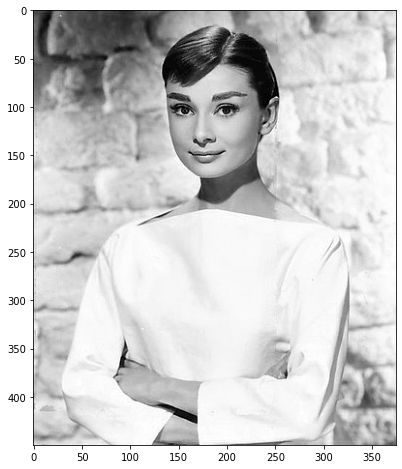

In [ ]:
import selectivesearch as ss
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
 
img = cv2.imread('./DLCV/data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2는 BGR, matplotlib은 RGB

print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [28]:
_, regions = ss.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

print(regions[0]) # left, top, width, height
print(regions[1])
print(regions[2])
#print(regions[21]) # 합쳐짐
#print(regions[35])

<class 'list'> 53
{'rect': (0, 0, 58, 257), 'size': 7918, 'labels': [0.0]}
{'rect': (16, 0, 270, 50), 'size': 5110, 'labels': [1.0]}
{'rect': (284, 0, 90, 420), 'size': 6986, 'labels': [2.0]}


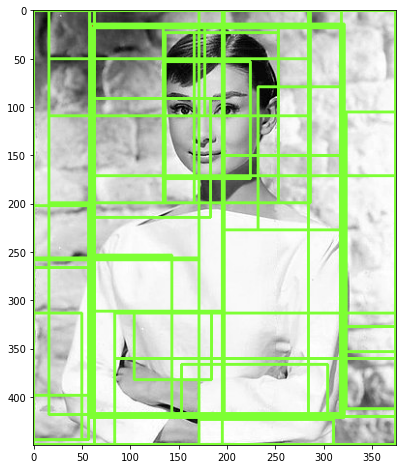

In [29]:
rects = [r['rect'] for r in regions if r['size'] > 3000]

green = (125, 255, 51)
img_ss = img_rgb.copy()
for rect in rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_ss = cv2.rectangle(img_ss, (left, top), (right, bottom), color=green, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_ss)
plt.show()

## IOU(Intersection over Union)

- 예측한 결과(Predicted)와 실측(Ground Truth)이 얼마나 겹치는가를 나타내는 지표
- IoU = Overlap(교집합) / Union(합집합)

In [30]:
import numpy as np 

def compute_iou(cand_box, gt_box): # 예측, 실측

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

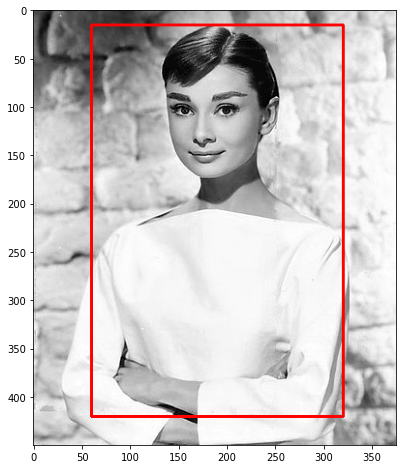

In [31]:
gt_box = [60, 15, 320, 420] # gt라고 가정

red = (255, 0 , 0)
img_gt = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_gt)
plt.show()

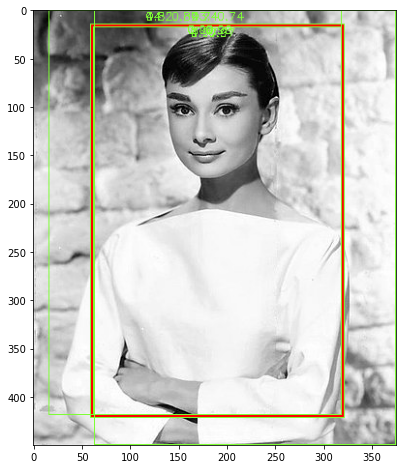

In [36]:
img_iou = img_gt

for index, cand_box in enumerate(rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    if iou > 0.7:
      cv2.rectangle(img_iou, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green, thickness=1)
      text = "{:.2f}".format(iou)
      cv2.putText(img_iou, text, (cand_box[0]+ 100, cand_box[1]+10), 
                  cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green, thickness=1)
      
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()